In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from timeit import default_timer as timer

%matplotlib inline

In [25]:
def rand_walk(timestep=1, sim_no=1, rho=False, no_steps=100):
    
    """
    Random walker function that takes arguments for the time step, number of simulations,
    momentum transfer approxiamtion value and number of steps.

    Returns plots of velocity and distance as a function of time. 
    
    Returns arrays for the final number of collisions,
    final velocities and displacements for each simulation.
    
    Returns mean squared displacement and velocities arrays.
    """
    
    start = timer()     
    
    np.random.seed(100)         # Seed for RNG to acheive reproducable results
    N = no_steps                # Number of steps
    t = np.arange(0,N,timestep) # Time array
    
    final_collisions = []       # List for final collisions per simulation
    v_final = []                #  "    "    "   velocities   "      "
    final_displacement = []     #  "    "    "   displacement "      "
    
    
    x2_avg = np.zeros(len(t))   # Initialize array for mean square displacement
    v2_avg = np.zeros(len(t))   #     "        "    "   "     "    velocity
    

    print('Timestep: ', timestep)
    print('Number of Simulations: ', sim_no)
    print('Number of Steps: ', N/timestep)

    
    # Subplot parameters
    #fig,axes = plt.subplots(2,1,figsize=(10,10), constrained_layout=True)
    
    
    
    
    for j in tqdm(range(sim_no)):  # Loop for simulations
        number_collisions = 0      # Reset collision number for each simulation
    
        
        x = np.zeros(len(t))       # Initilaize displacement array for each simulation
        v = np.zeros(len(t))       #    "       velocity       "    "    "      "
        
        

        
        for i in range(1, len(t)): # Loop for displacement and velocity values for each simulation

            x[i] = x[i-1] + v[i-1] # Displacement calculation
            
            
            if(np.random.random() < 0.1):  # Conditional statement for collison probability per timestep of 10%
                number_collisions += 1     # Updates number for each simulation 
                
                if(rho==False): # Conditional statement depending on whether momentum approximation is applied 
             
                    if(np.random.random() > 0.5): # Velocity calculation with 50% probability 
                        v[i] = v[i-1] + 1         # of positive or negative value
                    else:
                        v[i] = v[i-1] - 1
                
                else:
                    if(np.random.random() > 0.5): # Velocity calculation with 50% probability 
                        v[i] = rho * v[i-1] + 1   # with positive or negative value
                    else:
                        v[i] = rho * v[i-1] - 1
            else:
                v[i] = v[i-1]                      # Velocity update when no collision occurs
                
                   
        
        final_collisions.append(number_collisions) # Update number of collisions per simulation
        final_displacement.append(x[-1])           #   "    final displacement    "     "
        v_final.append(v[-1])                      #   "      "   velocity        "     "
        
        x2 = x**2                                  # Square displacement calculations
        x2_avg += x2
        
        v2 = v**2                                  # Square velocity calculation
        v2_avg += v2
        
      
        
#         vel_plot = axes[0].plot(t,v)               # Plotting for velocities
#         axes[0].set_ylabel('Velocity')
#         axes[0].set_xlabel('Time')
        
        
        
        
       
#         dist_plot = axes[1].plot(t,x, linewidth=1) # Plotting for displacements
#         axes[1].set_ylabel('Displacement')
#         axes[1].set_xlabel('Time')
        
        
    x2_avg = x2_avg/sim_no                         # Mean square displacements
    v2_avg = v2_avg/sim_no                         # Mean square velocities
    
    
    collisions = np.asarray(final_collisions)      # Convert lists to arrays  
    final_vel = np.asarray(v_final)
    displacement = np.asarray(final_displacement)
    
    plt.savefig('Test.png')                        # Save plot outputs
    
    end = timer()
    time_taken = end - start                       # Time calculation for each simulation
    print('{:.3f}'.format(time_taken), 'seconds')
    print('Mean displacement: {:.3e}'.format(np.mean(displacement**2)))
    
    
    #return vel_plot, dist_plot, collisions, final_vel, displacement, x2_avg, v2_avg
        #  [0],      [1],       [2],        [3],        [4],         [5],     [6]
        
    return collisions, final_vel, displacement, x2_avg, v2_avg

In [41]:
#(timestep, sim_no, rho, no_steps)
walk0 = rand_walk(1,100,False,80000) # Model 1
walk1 = rand_walk(1,100,0.9,80000)   # Model 2

Timestep:  1
Number of Simulations:  100
Number of Steps:  80000.0


12.872 seconds
Mean displacement: 2.098e+13
Timestep:  1
Number of Simulations:  100
Number of Steps:  80000.0


13.126 seconds
Mean displacement: 1.061e+08


<Figure size 432x288 with 0 Axes>

In [160]:
walk1 = rand_walk(1,500,0.9,100000)   # Model 2

In [150]:
def fit(walk):
    """"
    Gaussuan fit function for the mean square velocity for the random walk
    """
    def gaussian(x, mean, amplitude, standard_deviation):
        return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)

    binh, binb, _ = plt.hist(walk, bins='auto', label='Data', color='grey')  # Bin height and border unpack
    binc = binb[:-1] + np.diff(binb) / 2                                     # Finding the bin centers
    popt, pcov = curve_fit(gaussian, binc, binh, p0=[5, 2400, 1], absolute_sigma=True) # Fit parameters

    x_fit = np.linspace(binb[0], binb[-1]+1, 10000) 

    # PLot setup
    plot = plt.plot(x_fit, gaussian(x_fit, *popt), 'r--', label='Fit')
    plt.xlabel('Mean Square Velocity')
    plt.legend(loc='best')
    print('Mean {:.3f}'.format(popt[0]), ' {:.3f}'.format(np.sqrt(np.diag(pcov))[0]))
    print('Amplitude {:.3f}'.format(popt[1]), ' {:.3f}'.format(np.sqrt(np.diag(pcov))[1]))
    print('STD {:.3f}'.format(popt[2]), ' {:.3f}'.format(np.sqrt(np.diag(pcov))[2]))
    
    return plot

Mean 5.267  0.000
Amplitude 2319.180  0.222
STD 0.452  0.000


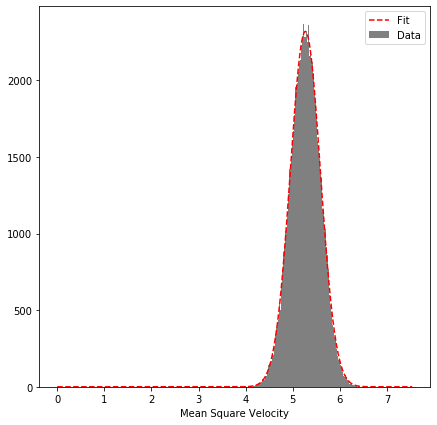

In [158]:
# Means Square Velocity for ρ = 0.9

plt.figure(figsize=(7,7))

plt.xlabel('Mean Square Velocity')
fit(walk1[6]);
plt.savefig('Mean Squar Velocity.png')

# Model 1 

Text(0.5, 1.0, 'Mean Displacement')

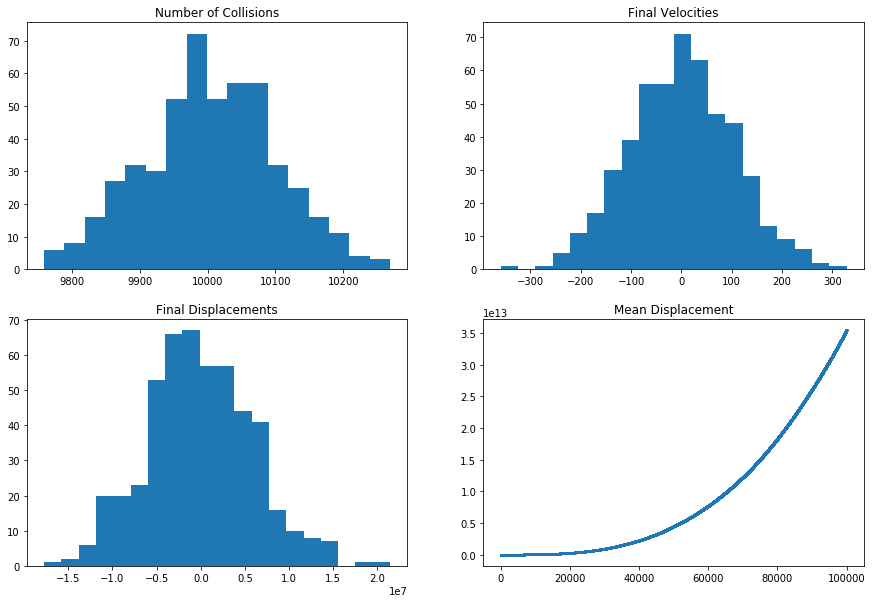

In [40]:
fig, axs = plt.subplots(2,2, figsize=(15,10))

fig.suptitle

#axs[0].title('Mean Square Velocity')
axs[0,0].hist(walk0[2], bins='auto');
axs[0,0].set_title('Number of Collisions')
axs[0,1].hist(walk0[3], bins='auto');
axs[0,1].set_title('Final Velocities')
axs[1,0].hist(walk0[4], bins='auto');
axs[1,0].set_title('Final Displacements')
axs[1,1].plot(walk0[5], '.', markersize=2);
axs[1,1].set_title('Mean Displacement')

# Model 2

Text(0.5, 1.0, 'Mean Displacement')

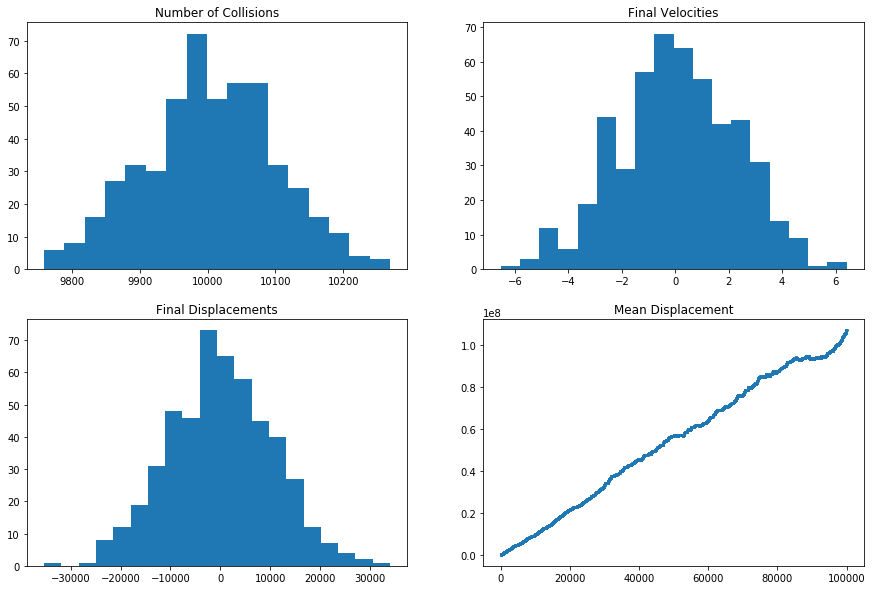

In [41]:
fig, axs = plt.subplots(2,2, figsize=(15,10))

axs[0,0].hist(walk1[2], bins='auto');
axs[0,0].set_title('Number of Collisions')
axs[0,1].hist(walk1[3], bins='auto');
axs[0,1].set_title('Final Velocities')
axs[1,0].hist(walk1[4], bins='auto');
axs[1,0].set_title('Final Displacements')
axs[1,1].plot(walk1[5], '.', markersize=2);
axs[1,1].set_title('Mean Displacement')

In [126]:
""""
Linear and cubic fit functions and parameters output
""""
x = np.linspace(0,100000, 100000)

def func(x, a):
    return a * x**3


def linear(x,m,c):
    return m*x + c

popt1, pcov1 = curve_fit(func, x, walk0[5])
popt2, pcov2 = curve_fit(linear, x, walk1[5])
popt3, pcov3 = curve_fit(linear, x, walk0[6])

# Linear and Cubic plots

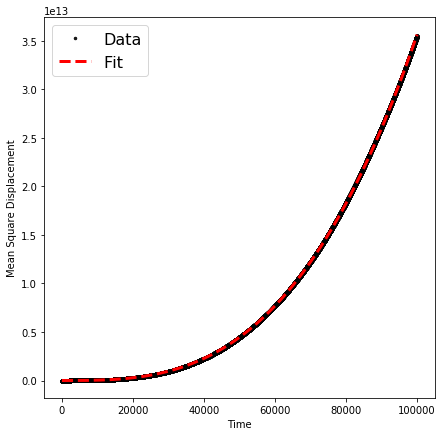

In [161]:
plt.figure(figsize=(7,7))


plt.xlabel('Time')
plt.ylabel('Mean Square Displacement')
plt.plot(walk0[5], 'k.', markersize=5, alpha=0.9, label='Data')
plt.plot(x, func(x, *popt1), 'r--', linewidth=3, label='Fit')

plt.legend(fontsize=16)
plt.savefig('MeanDisplacement_no_rho.png')

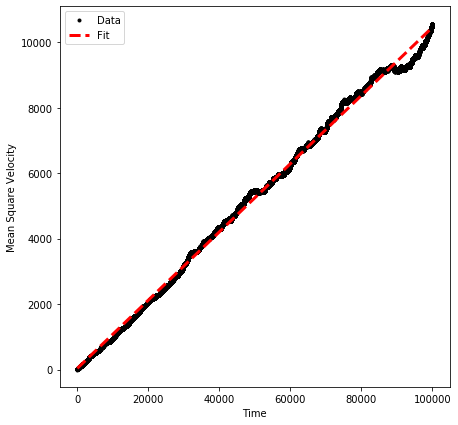

In [162]:
plt.figure(figsize=(7,7))

plt.xlabel('Time')
plt.ylabel('Mean Square Velocity')
plt.plot(walk0[6], 'k.', label='Data')
plt.plot(x, linear(x, *popt3), 'r--', linewidth=3, label='Fit')
plt.legend(loc='best')

plt.savefig('MeanVeloctiyNoRho.png')

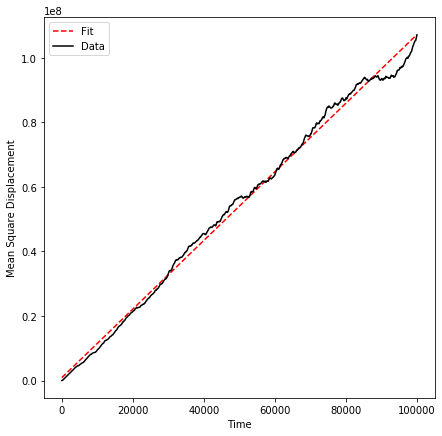

In [156]:
plt.figure(figsize=(7,7))

plt.xlabel('Time')
plt.ylabel('Mean Square Displacement')

plt.plot(x, linear(x,*popt2), 'r--', label='Fit')
plt.plot(walk1[5], 'k', label='Data')
plt.legend(loc='best')

plt.savefig('MeanSquareDispla_rho09.png')